In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/chocolate-bar-ratings-2022/Chocolate bar ratings 2022.csv


### Obs: I am a brazilian learning english. Sorry for the bad english =/

# Chocolate database EDA

## About the dataset
The dataset comprises various chocolate bars with their ingredients. These determine the overall taste and flavour of the chocolates, which consequently affect their ratings.

The chocolate reviews are between 2006 and 2022. The dataset was last updated on June 26, 2022.
Rating Scale

The ratings are between 1 and 5 with 1 considered the lowest rating and 5 as the highest rating possible.

    4.0 - 5.0 = Outstanding
    3.5 - 3.9 = Highly Recommended
    3.0 - 3.49 = Recommended
    2.0 - 2.9 = Disappointing
    1.0 - 1.9 = Unpleasant

### Review Guide

Ratings assigned to the chocolate bars are based on the following aspects:

    Flavor is the most important component of the Flavors of Cacao ratings. Diversity, balance, intensity and purity of flavors are all considered.
    Texture has a great impact on the overall experience and it is also possible for texture-related issues to impact flavour.
    Aftermelt is the experience after the chocolate has melted. Higher quality chocolate will linger and be long-lasting and enjoyable.
    Overall Opinion is really where the ratings reflect a subjective opinion.
    Other Notes- These are topics that may be interesting to discuss but may not necessarily impact the flavour or experience. For example, appearance, snap, packaging, cost etc.


## Goals

- Understanding what makes a high rating chocolate
- Which characteristics affects the most

## Loading the dataset

In [2]:
chocolate_rating_data = pd.read_csv('/kaggle/input/chocolate-bar-ratings-2022/Chocolate bar ratings 2022.csv')

In [3]:
chocolate_rating_data.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [4]:
chocolate_rating_data.shape

(2588, 10)

## Checking the integrity of data

In [5]:
chocolate_rating_data.describe()

,REF,Review Date,Rating
count,2588.000000,2588.000000,2588.000000
mean,1459.185471,2014.545209,3.198319
std,773.852201,4.082722,0.444069
min,5.000000,2006.000000,1.000000
25%,820.000000,2012.000000,3.000000
50%,1470.000000,2015.000000,3.250000
75%,2122.000000,2018.000000,3.500000
max,2768.000000,2022.000000,4.000000


The numeric data seems to make sense, with all rating values between 1 and 5, and all review date values between 2006 and 2022

In [6]:
chocolate_rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2588 non-null   int64  
 1   Company (Manufacturer)            2588 non-null   object 
 2   Company Location                  2588 non-null   object 
 3   Review Date                       2588 non-null   int64  
 4   Country of Bean Origin            2588 non-null   object 
 5   Specific Bean Origin or Bar Name  2588 non-null   object 
 6   Cocoa Percent                     2588 non-null   object 
 7   Ingredients                       2501 non-null   object 
 8   Most Memorable Characteristics    2588 non-null   object 
 9   Rating                            2588 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 202.3+ KB


In [7]:
chocolate_rating_data['Company (Manufacturer)'].value_counts()

Soma                                  57
Fresco                                39
Arete                                 32
Bonnat                                30
A. Morin                              29
                                      ..
Rococo (Grenada Chocolate Co.)         1
Cacao Arabuco                          1
Britarev                               1
Love Bar                               1
Chocolates by Josh (Box Chocolate)     1
Name: Company (Manufacturer), Length: 593, dtype: int64

In [8]:
chocolate_rating_data['Company Location'].value_counts()

U.S.A.                   1168
France                    179
Canada                    178
U.K.                      134
Italy                      79
                         ... 
St.Vincent-Grenadines       1
Wales                       1
Martinique                  1
Ghana                       1
Suriname                    1
Name: Company Location, Length: 65, dtype: int64

In [9]:
chocolate_rating_data['Country of Bean Origin'].value_counts()

Venezuela             254
Peru                  248
Dominican Republic    234
Ecuador               223
Madagascar            184
                     ... 
China                   1
Principe                1
Sulawesi                1
Suriname                1
DR Congo                1
Name: Country of Bean Origin, Length: 63, dtype: int64

In [10]:
chocolate_rating_data['Cocoa Percent'].value_counts()

70%       1070
75%        312
72%        309
65%         93
80%         90
68%         75
74%         69
73%         67
60%         46
71%         44
77%         43
85%         40
64%         37
76%         35
67%         35
66%         28
78%         22
100%        21
82%         18
62%         16
55%         16
63%         15
69%         13
90%          9
88%          8
58%          8
61%          7
81%          6
83%          5
84%          4
72.50%       4
91%          3
99%          2
89%          2
56%          2
73.50%       2
71.50%       2
79%          2
60.50%       1
57%          1
46%          1
50%          1
42%          1
86%          1
53%          1
87%          1
Name: Cocoa Percent, dtype: int64

In [11]:
chocolate_rating_data['Ingredients'].value_counts()

3- B,S,C          1029
2- B,S             738
4- B,S,C,L         293
5- B,S,C,V,L       184
4- B,S,C,V         141
2- B,S*             31
4- B,S*,C,Sa        20
3- B,S*,C           13
3- B,S,L             8
4- B,S*,C,V          7
1- B                 6
5-B,S,C,V,Sa         6
4- B,S,V,L           5
4- B,S,C,Sa          5
6-B,S,C,V,L,Sa       4
3- B,S,V             3
4- B,S*,V,L          3
4- B,S*,C,L          2
3- B,S*,Sa           1
2- B,C               1
5- B,S,C,L,Sa        1
Name: Ingredients, dtype: int64

In [12]:
chocolate_rating_data[chocolate_rating_data['Ingredients'].isna()]

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
88,1964,Amazing Cacao,Russia,2017,Peru,Maranon,70%,NaN,"raisins, pungent",3.00
89,1964,Amazing Cacao,Russia,2017,Peru,Platan Bajo,70%,NaN,"few grits, blackcherry, licorice",3.50
167,486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100%,NaN,"very nutty, very bitter",1.75
303,81,Bonnat,France,2006,Blend,One Hundred,100%,NaN,"acidic, bitter, dry",1.50
330,341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100%,NaN,"cardboard, very bitter, floral",1.50
...,...,...,...,...,...,...,...,...,...,...
2478,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",100%,NaN,"bland, mild fruit, strong bitter",2.00
2479,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",90%,NaN,"some fruit, strong bitter",2.00
2480,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",75%,NaN,"cocoa,earthy,very astringent",3.00
2505,733,Whittakers,New Zealand,2011,Ghana,Ghana,72%,NaN,"sticky, dry, vanilla dominates",2.50


In [13]:
chocolate_rating_data.loc[chocolate_rating_data['Ingredients'].isna(), ['Cocoa Percent']].value_counts()

Cocoa Percent
70%              32
100%             14
65%               8
72%               8
80%               4
64%               3
75%               3
63%               2
68%               2
60%               2
85%               2
66%               1
55%               1
77%               1
82%               1
88%               1
90%               1
99%               1
dtype: int64

Since there is only a few missing values in Ingredients, we are goind just to remove these entries

In [14]:
chocolate_rating_data = chocolate_rating_data.dropna(axis=0, subset='Ingredients')

In [15]:
chocolate_rating_data['Most Memorable Characteristics'].value_counts()

spicy, cocoa                         4
creamy, nutty, cocoa                 4
sweet, vanilla, cocoa                3
sandy, sweet, cocoa                  3
sweet, marshmallow                   3
                                    ..
roasty, hammy, sour                  1
dried fruit, raisiny, mild roast     1
fatty, floral, rum, roasty           1
dominate roast, fruit then earthy    1
muted, roasty, accessible            1
Name: Most Memorable Characteristics, Length: 2461, dtype: int64

The entire dataset seems to be clean and consistent.

## Formatting data

### Turning Cocoa percent numeric

In [16]:
chocolate_rating_data['Cocoa Percent']

0       76%
1       76%
2       76%
3       68%
4       68%
       ... 
2583    80%
2584    75%
2585    75%
2586    70%
2587    72%
Name: Cocoa Percent, Length: 2501, dtype: object

In [17]:
chocolate_rating_data['Cocoa Percent'].value_counts()

70%       1038
75%        309
72%        301
80%         86
65%         85
68%         73
74%         69
73%         67
71%         44
60%         44
77%         42
85%         38
67%         35
76%         35
64%         34
66%         27
78%         22
82%         17
62%         16
55%         15
69%         13
63%         13
58%          8
90%          8
61%          7
100%         7
88%          7
81%          6
83%          5
84%          4
72.50%       4
91%          3
73.50%       2
79%          2
71.50%       2
89%          2
56%          2
46%          1
53%          1
99%          1
86%          1
57%          1
60.50%       1
42%          1
50%          1
87%          1
Name: Cocoa Percent, dtype: int64

In [18]:
# all of the percentages ends with %, so we can do
chocolate_rating_data['Cocoa Percent'] = pd.to_numeric(chocolate_rating_data['Cocoa Percent'].str[:-1])
chocolate_rating_data['Cocoa Percent']

0       76.0
1       76.0
2       76.0
3       68.0
4       68.0
        ... 
2583    80.0
2584    75.0
2585    75.0
2586    70.0
2587    72.0
Name: Cocoa Percent, Length: 2501, dtype: float64

### Dividing the ingredients column

In [19]:
chocolate_rating_data['Ingredients'].value_counts()

3- B,S,C          1029
2- B,S             738
4- B,S,C,L         293
5- B,S,C,V,L       184
4- B,S,C,V         141
2- B,S*             31
4- B,S*,C,Sa        20
3- B,S*,C           13
3- B,S,L             8
4- B,S*,C,V          7
1- B                 6
5-B,S,C,V,Sa         6
4- B,S,V,L           5
4- B,S,C,Sa          5
6-B,S,C,V,L,Sa       4
3- B,S,V             3
4- B,S*,V,L          3
4- B,S*,C,L          2
3- B,S*,Sa           1
2- B,C               1
5- B,S,C,L,Sa        1
Name: Ingredients, dtype: int64

Here, we can see that all bars have beans as a ingredient, so we going to create boolean columns that inform the presence of other ingredients

In [20]:
def create_ingredient_column(chocolate_rating_data, ing_abr, ing_name):
    """Create a new boolean column ing_name, informing if the ingredient is present"""
    
    # the regex=False is necessary because of the sweetener abbreviation (S*)
    # the first part checks if the ingredient is inside of the list, the second part covers the
    # case where the ingredient is the last element
    chocolate_rating_data[ing_name] = chocolate_rating_data['Ingredients'].str.contains(',' + ing_abr + ',', regex=False) \
                                    | chocolate_rating_data['Ingredients'].str.endswith(ing_abr)
    

ingredients = [
    ['S', 'sugar'],
    ['S*', 'sweetener'],
    ['C', 'cocoa butter'],
    ['V', 'vanilla'],
    ['Sa', 'salt']
]

for ingredient in ingredients:
    create_ingredient_column(chocolate_rating_data, ingredient[0], ingredient[1])
    
chocolate_rating_data[['Ingredients', 'sugar', 'sweetener', 'cocoa butter', 'vanilla', 'salt']].groupby('Ingredients').first()

,sugar,sweetener,cocoa butter,vanilla,salt
Ingredients,,,,,
1- B,False,False,False,False,False
"2- B,C",False,False,True,False,False
"2- B,S",True,False,False,False,False
"2- B,S*",False,True,False,False,False
"3- B,S*,C",False,True,True,False,False
"3- B,S*,Sa",False,True,False,False,True
"3- B,S,C",True,False,True,False,False
"3- B,S,L",True,False,False,False,False
"3- B,S,V",True,False,False,True,False


In [21]:
(chocolate_rating_data['sugar'] & chocolate_rating_data['sweetener']).value_counts()

False    2501
dtype: int64

We can see that in the database, a chocolate is sweetened with sugar or sweetener, but never with both.

In [22]:
# we will create a column informing how the chocolate was sweetened
chocolate_rating_data['Sweetened by'] = 'nothing'
chocolate_rating_data.loc[chocolate_rating_data['sugar'], ['Sweetened by']] = 'sugar'
chocolate_rating_data.loc[chocolate_rating_data['sweetener'], ['Sweetened by']] = 'sweetener'

# so we don't need more these columns
chocolate_rating_data = chocolate_rating_data.drop(columns=['sugar', 'sweetener'])

chocolate_rating_data[['Ingredients', 'Sweetened by']].groupby('Ingredients').first()

,Sweetened by
Ingredients,
1- B,nothing
"2- B,C",nothing
"2- B,S",sugar
"2- B,S*",sweetener
"3- B,S*,C",sweetener
"3- B,S*,Sa",sweetener
"3- B,S,C",sugar
"3- B,S,L",sugar
"3- B,S,V",sugar


In [23]:
# Last, we obtain the number of ingredients
chocolate_rating_data['N of ingredients'] = pd.to_numeric(chocolate_rating_data['Ingredients'].str[0])
chocolate_rating_data[['Ingredients', 'N of ingredients']].groupby('Ingredients').first()

,N of ingredients
Ingredients,
1- B,1
"2- B,C",2
"2- B,S",2
"2- B,S*",2
"3- B,S*,C",3
"3- B,S*,Sa",3
"3- B,S,C",3
"3- B,S,L",3
"3- B,S,V",3


### Memorable characteristics division

In [24]:
chocolate_rating_data['Most Memorable Characteristics'].head()

0        rich cocoa, fatty, bready
1     cocoa, blackberry, full body
2           cocoa, vegetal, savory
3              chewy, off, rubbery
4    milk brownie, macadamia,chewy
Name: Most Memorable Characteristics, dtype: object

In [25]:
chocolate_rating_data['Most Memorable Characteristics'].nunique()

2461

In [26]:
characteristics = chocolate_rating_data['Most Memorable Characteristics'].str.split(',', expand=True)
characteristics

,0,1,2,3,4
0,rich cocoa,fatty,bready,None,None
1,cocoa,blackberry,full body,None,None
2,cocoa,vegetal,savory,None,None
3,chewy,off,rubbery,None,None
4,milk brownie,macadamia,chewy,None,None
...,...,...,...,...,...
2583,waxy,cloying,vegetal,None,None
2584,strong nutty,marshmallow,None,None,None
2585,fatty,earthy,cocoa,None,None
2586,fatty,mild nuts,mild fruit,None,None


In [27]:
characteristics = characteristics.rename(columns={
    0: 'characteristic 1',
    1: 'characteristic 2',
    2: 'characteristic 3',
    3: 'characteristic 4',
    4: 'characteristic 5'
})

characteristics.head()

,characteristic 1,characteristic 2,characteristic 3,characteristic 4,characteristic 5
0,rich cocoa,fatty,bready,None,None
1,cocoa,blackberry,full body,None,None
2,cocoa,vegetal,savory,None,None
3,chewy,off,rubbery,None,None
4,milk brownie,macadamia,chewy,None,None


In [28]:
chocolate_rating_data = pd.concat([chocolate_rating_data, characteristics], axis=1)
chocolate_rating_data

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,cocoa butter,vanilla,salt,Sweetened by,N of ingredients,characteristic 1,characteristic 2,characteristic 3,characteristic 4,characteristic 5
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,True,False,False,sugar,3,rich cocoa,fatty,bready,None,None
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,True,False,False,sugar,3,cocoa,blackberry,full body,None,None
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,True,False,False,sugar,3,cocoa,vegetal,savory,None,None
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00,True,False,False,sugar,3,chewy,off,rubbery,None,None
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,"3- B,S,C","milk brownie, macadamia,chewy",3.50,True,False,False,sugar,3,milk brownie,macadamia,chewy,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,True,False,True,sweetener,4,waxy,cloying,vegetal,None,None
2584,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75,True,False,False,sugar,3,strong nutty,marshmallow,None,None,None
2585,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,"3- B,S,C","fatty, earthy, cocoa",3.00,True,False,False,sugar,3,fatty,earthy,cocoa,None,None
2586,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,True,False,False,sugar,3,fatty,mild nuts,mild fruit,None,None


In [29]:
chocolate_rating_data[['characteristic 1']].nunique()

characteristic 1    530
dtype: int64

In [30]:
chocolate_rating_data[['characteristic 1', 'characteristic 2', 'characteristic 3','characteristic 4','characteristic 5']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2501 entries, 0 to 2587
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   characteristic 1  2501 non-null   object
 1   characteristic 2  2411 non-null   object
 2   characteristic 3  1807 non-null   object
 3   characteristic 4  293 non-null    object
 4   characteristic 5  3 non-null      object
dtypes: object(5)
memory usage: 117.2+ KB


Only a few entries have a fourth and fifth characteristic, to simplify the analysis we are going to ignore these

In [31]:
chocolate_rating_data = chocolate_rating_data.drop(columns=['characteristic 4', 'characteristic 5'])

In [32]:
chocolate_rating_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2501 entries, 0 to 2587
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2501 non-null   int64  
 1   Company (Manufacturer)            2501 non-null   object 
 2   Company Location                  2501 non-null   object 
 3   Review Date                       2501 non-null   int64  
 4   Country of Bean Origin            2501 non-null   object 
 5   Specific Bean Origin or Bar Name  2501 non-null   object 
 6   Cocoa Percent                     2501 non-null   float64
 7   Ingredients                       2501 non-null   object 
 8   Most Memorable Characteristics    2501 non-null   object 
 9   Rating                            2501 non-null   float64
 10  cocoa butter                      2501 non-null   bool   
 11  vanilla                           2501 non-null   bool   
 12  salt  

Now we can start the analysis

## EDA

### Ratings
First, let's understand the distribution of ratings

<Axes: xlabel='Rating', ylabel='Count'>

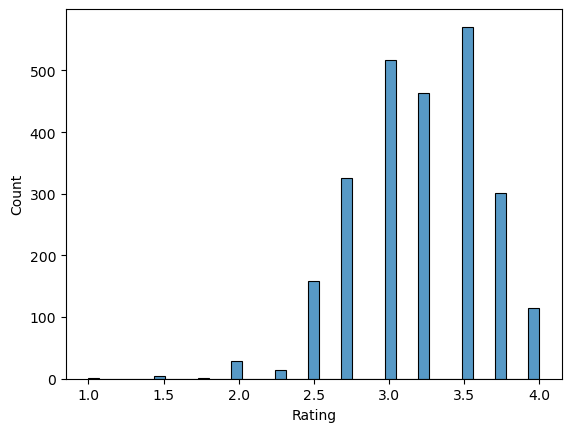

In [33]:
sns.histplot(chocolate_rating_data['Rating'])

We can see the majority of ratings are between 2.5 and 4.

The rating system goes from 1 to 5, but there are no ratings above 4

In [34]:
chocolate_rating_data['Rating'].describe()

count    2501.000000
mean        3.211815
std         0.427366
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: Rating, dtype: float64

In [35]:
chocolate_rating_data['Rating'].value_counts()

3.50    571
3.00    517
3.25    463
2.75    326
3.75    301
2.50    159
4.00    114
2.00     29
2.25     14
1.50      5
1.75      1
1.00      1
Name: Rating, dtype: int64

In [36]:
# does the rating vary on time?
yearly_reviews = chocolate_rating_data.groupby('Review Date').agg(rating_mean=('Rating', np.mean), rating_std=('Rating', np.std))
yearly_reviews

,rating_mean,rating_std
Review Date,,
2006,3.062500,0.660035
2007,3.166667,0.598200
2008,3.038690,0.494692
2009,3.088496,0.439308
2010,3.188830,0.431748
2011,3.271242,0.475508
2012,3.206944,0.464396
2013,3.214689,0.431974
2014,3.197531,0.409184


<Axes: xlabel='Review Date', ylabel='Rating'>

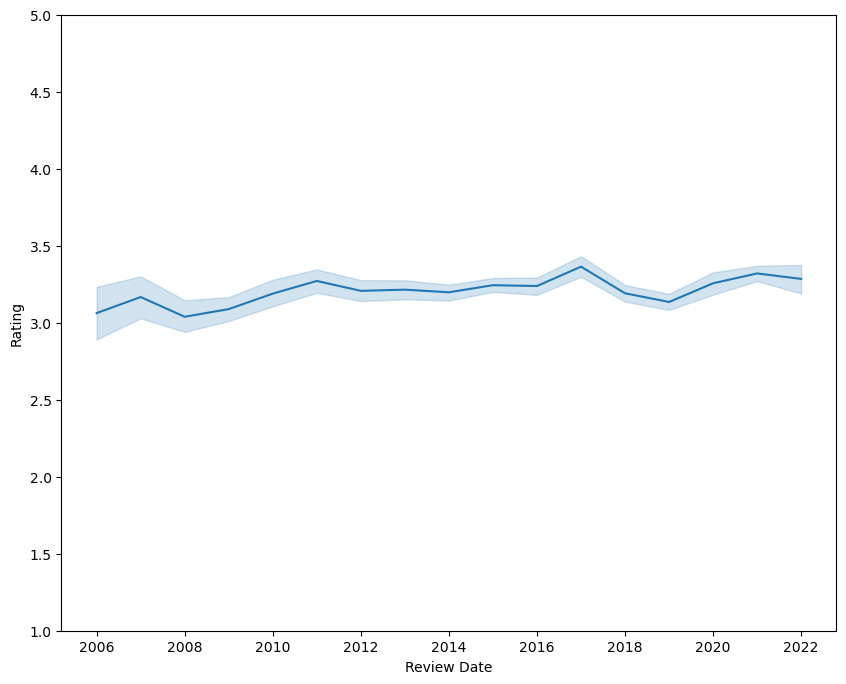

In [37]:
plt.figure(figsize=(10, 8))
plt.ylim(1, 5)
sns.lineplot(data=chocolate_rating_data, x='Review Date', y='Rating')

#### Insights
The reviews are most of 3 and 3.5 points, and are vrey stable over time.

### Company

Now let's see how the companies and their locations are distribued and how this affects the ratings

In [38]:
chocolate_rating_data['Company (Manufacturer)'].nunique()

555